## **1. Introduction** <a id="1"></a>

The goal of this notebook is to figure out how important height and wingspan is when playing defense. Over the past few years we've seen a steady increase in long wing players, the question is will it prove to be a succesful strategy in the future? Using data from the 2021-2022 NBA season we'll analyze the success of teams based on average height, wingspan, and other defensive metrics to see what really influences a teams success.

<a><img style="float: right;" src="https://outdoorbasketballhub.com/wp-content/uploads/2021/12/Tacko-Fall.jpg" width="400" /></a>



### **1.1 Table of Contents** <a id="1.1"></a>
* [1. Introduction](#1)
   * [1.1 Table of Contents](#1.1)
   * [1.2 Import Libraries](#1.2)
* [2. Data Preparation](#2)
   * [2.1 Exploring Data](#2.1)
* [3. Height and Wingspan Exploration](#3)
   * [3.1 Visualizing and Exploring Height and Wingspan for each team](#3.1)
   * [3.2 Visualizing the correlation between Height, Wingspan, and Defensive Rating](#3.2)
   * [3.3 Defense and Winning](#3.3)
   * [3.4 Defensive Variable Correllation](#3.4)
   * [3.5 Defenseve Rating vs Defensive Rebound](#3.5)
   * [3.6 Defensive Variable's Impact on Winning](#3.6)
* [4. Predicting Wins based off of Highly Correlated Defensive Variables](#4)
* [5. Conclusion](#5)

### 1.2 Import Libraries <a id="1.2"></a>

In [1]:
#Import libraries needed for the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
import os
from sklearn.decomposition import PCA
import imageio
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import XGBRegressor

## **2. Data Preparation** <a id="2"></a>

In [2]:
#Load data for NBA Players heights and wingspan from 2021-2022 nba season
nba_heights = pd.read_csv('../input/nba-dataset/NBAHeightWingspan - NBAHeightWingspan.csv')
nba_defense = pd.read_csv('../input/nba-dataset/NBAHeightWingspan - DefensiveRating.csv')
nba_heights.head()

,Name,Team,Position,Height,Wingspan,Ratio,DefRating,Wins,Losses
0,Mo Bamba,ORL,C,83.25,94.00,1.129129,112.1,22,60
1,Talen Horton-Tucker,LAL,SF,74.50,85.25,1.144295,112.8,33,49
2,Eric Paschall,UTA,PF,78.00,87.75,1.125000,110.0,49,33
3,Jalen Williams,OKC,SG,76.50,86.25,1.127451,111.7,24,58
4,Isaiah Stewart,DET,C,79.25,88.75,1.119874,113.3,23,59


### 2.1 Exploring Data <a id="2.1"></a>

In [3]:
#find the average height and wingspan of players by position
nba_heights_avg = nba_heights.groupby('Position').mean().round(4)
nba_heights_avg.head()

,Height,Wingspan,Ratio,DefRating,Wins,Losses
Position,,,,,,
C,82.0116,87.5145,1.0672,111.5767,39.7558,42.2442
PF,79.8634,84.4767,1.0581,111.4884,41.3023,40.6977
PG,73.8851,78.5862,1.0638,111.4690,40.7241,41.2759
SF,78.2102,82.5057,1.0551,111.4591,40.1250,41.8750
SG,76.0734,80.5665,1.0592,111.6908,40.1376,41.8624


##### This table tells me that team's who run bigger lineups don't have the same success as teams that run smaller lineups. Team's who run more Center's lose on average 1.54 more games than teams who run a more PF heavy based lineup.

## **3. Height and Wingspan Exploration** <a id="3"></a>

## 3.1 Visualizing and Exploring Height and Wingspan for each team <a id="3.1"></a>

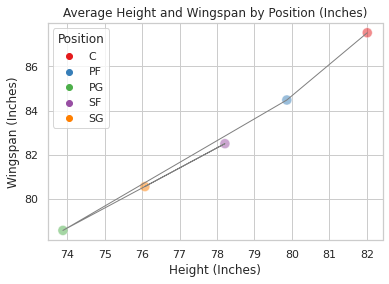

In [4]:
#View average height and wingspan of players by position
sns.set(style="whitegrid")
sns.scatterplot(x="Height", y="Wingspan", data=nba_heights_avg, hue="Position", palette="Set1", s=100, alpha=0.5)
plt.title('Average Height and Wingspan by Position (Inches)')
plt.xlabel('Height (Inches)')
plt.ylabel('Wingspan (Inches)')
plt.plot(nba_heights_avg['Height'], nba_heights_avg['Wingspan'],color='grey', linewidth=1)
plt.show()

In [5]:
#find the average height and wingspan of players by team
nba_heights_avg_team = nba_heights.groupby('Team').mean().round(4)
nba_heights_avg_team.head()

,Height,Wingspan,Ratio,DefRating,Wins,Losses
Team,,,,,,
ATL,77.8824,82.6912,1.0616,113.7,43.0,39.0
BKN,77.4219,81.4531,1.0518,112.3,44.0,38.0
BOS,76.7045,81.9773,1.0688,106.2,51.0,31.0
CHA,78.2500,83.3611,1.0659,113.1,43.0,39.0
CHI,78.3750,83.4821,1.0647,113.2,46.0,36.0


In [6]:
#Find the highest average ratio of height and wingspan of players by team
nba_heights_avg_team.sort_values(by='Ratio', ascending=False).head(1).round(4)

,Height,Wingspan,Ratio,DefRating,Wins,Losses
Team,,,,,,
LAL,76.8833,82.6333,1.0749,112.8,33.0,49.0


In [7]:
#Find the average ratio of height and wingspan of players by team
nba_heights_avg_team.sort_values(by='Ratio', ascending=True).head(1).round(4)

,Height,Wingspan,Ratio,DefRating,Wins,Losses
Team,,,,,,
MIA,78.1346,81.5769,1.044,108.4,53.0,29.0


In [8]:
#Find the highest average ratio of height and wingspan of players by team
nba_heights_avg_team.sort_values(by='Height' and 'Wingspan', ascending=False).head(1).round(4)

,Height,Wingspan,Ratio,DefRating,Wins,Losses
Team,,,,,,
MIN,78.1964,83.5893,1.0692,111.0,46.0,36.0


In [9]:
#Find the lowest average ratio of height and wingspan of players by team
nba_heights_avg_team.sort_values(by='Height' and 'Wingspan', ascending=True).head(1).round(4)

,Height,Wingspan,Ratio,DefRating,Wins,Losses
Team,,,,,,
MEM,78.0,81.4265,1.0443,108.9,56.0,26.0


## 3.2 Visualizing the correlation between Height, Wingspan, and Defensive Rating  <a id="3.2"></a>

In [10]:
fig = go.Figure(data=go.Scatter(x=nba_heights['Height'],
                                y=nba_heights['DefRating'],
                                mode='markers',
                                text=nba_heights['Name'],
                                marker=dict(color='#17408b')
                                ))

fig.update_layout(
    title='NBA Player Height and Defensive rating (for interactive exploration)',
    xaxis_title='Height (Inches)',
    yaxis_title='Defensive Rating',
    plot_bgcolor='rgba(1,1,1,0)'
)
fig.show()

##### Defensive rating simply shows how many points a player allows per 100 possessions. Defensive rating also eliminates factors like pace of play and minutes played per game. It is also important to note that as opposed to most other basketball stats, lower numbers are better when it comes to defensive rating.



##### The Los Angeles Lakers have the highest average ratio of wingspan to height in the NBA. The Miami Heat have the lowest average ratio of wingspan to height in the NBA. You would assume that the team with the higher average ratio of wingspan to height would have a better team defensive rating than the team with the lowest average ratio of wingspan to height, but this was not the case. The next questio we ask is to see how correlated these two variables are.

In [11]:
#find the pearson correlation coefficient between DefRating and Height and wingspan
nba_heights_avg_team.corr()['Height' and 'Wingspan']['DefRating']

0.07973912389948115

In [12]:
#find the pearson correlation coefficient between DefRating and Ratio
nba_heights_avg_team.corr()['Ratio']['DefRating']

0.03260683828022273

##### There is an extremely small correlation between height, wingspan, ratio, and defensive rating. We can conclude that length does not impact a teams defensive success.

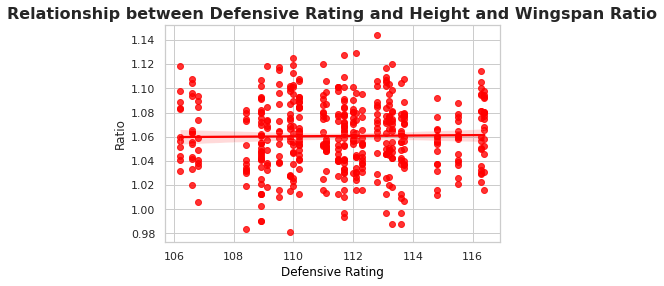

In [13]:
#create a scatter plot of DefRating and Height and wingspan ratio
sns.regplot(x='DefRating', y='Ratio', data = nba_heights, color='red')
plt.title('Relationship between Defensive Rating and Height and Wingspan Ratio', fontsize=16, fontweight='bold')
plt.xlabel('Defensive Rating', fontsize=12, color='black')
plt.ylabel('Ratio')
plt.show()

##### The correlation between the average ratio of wingspan to height and defensive rating shows that there is an extremely small positive correlation. This tells us that longer teams don't neccesarily translate to better defense. Defensive rating doesn't correlate well to teams with high average height to wingspan ratio.

## 3.3 Defense and Winning <a id="3.3"></a>

In [14]:
nba_defense.head()

,TEAM,DEF RTG,W,L,DREB,DREB%,STL,BLK,OPP PTS\nOFF TOV,OPP PTS\n2ND CHANCE,OPP PTS\nFB,OPP PTS\nPAINT
0,PHX,106.8,64,18,35.5,72.8,8.6,4.4,14.8,13.6,11.3,45.2
1,MEM,108.9,56,26,35.0,72.6,9.8,6.5,14.5,13.0,13.2,47.4
2,GSW,106.6,53,29,35.7,73.6,8.8,4.5,16.9,12.7,12.3,43.9
3,MIA,108.4,53,29,33.9,73.5,7.4,3.2,16.7,12.6,12.2,41.3
4,DAL,109.1,52,30,33.8,73.3,6.7,4.0,14.4,13.1,12.0,47.1


In [15]:
#find the team with the highest Defensive Rating
nba_defense.sort_values(by='DEF RTG', ascending=False).head(1)

,TEAM,DEF RTG,W,L,DREB,DREB%,STL,BLK,OPP PTS\nOFF TOV,OPP PTS\n2ND CHANCE,OPP PTS\nFB,OPP PTS\nPAINT
29,HOU,116.4,20,62,32.4,71.0,7.3,4.7,21.2,14.7,15.8,53.2


In [16]:
#find the lowest average Defensive Rating
nba_defense.sort_values(by='DEF RTG', ascending=True).head(1)

,TEAM,DEF RTG,W,L,DREB,DREB%,STL,BLK,OPP PTS\nOFF TOV,OPP PTS\n2ND CHANCE,OPP PTS\nFB,OPP PTS\nPAINT
5,BOS,106.2,51,31,35.5,72.5,7.2,5.8,15.2,12.5,11.5,42.5


## 3.4 Defensive Variable Correllation <a id="3.4"></a>

In [17]:
#What variables can be used to predict the Defensive Rating?
nba_defense.corr()['DEF RTG'].sort_values(ascending=False)

DEF RTG                1.000000
L                      0.770845
OPP PTS\nPAINT         0.688810
OPP PTS\nOFF TOV       0.516370
OPP PTS\nFB            0.341461
OPP PTS\n2ND CHANCE    0.262253
BLK                   -0.009876
DREB%                 -0.252611
STL                   -0.280294
DREB                  -0.577995
W                     -0.770845
Name: DEF RTG, dtype: float64

In [18]:
nba_heights.corr()['DefRating'].sort_values(ascending=False)

DefRating    1.000000
Losses       0.753068
Ratio        0.014501
Wingspan     0.003822
Height      -0.004438
Wins        -0.753068
Name: DefRating, dtype: float64

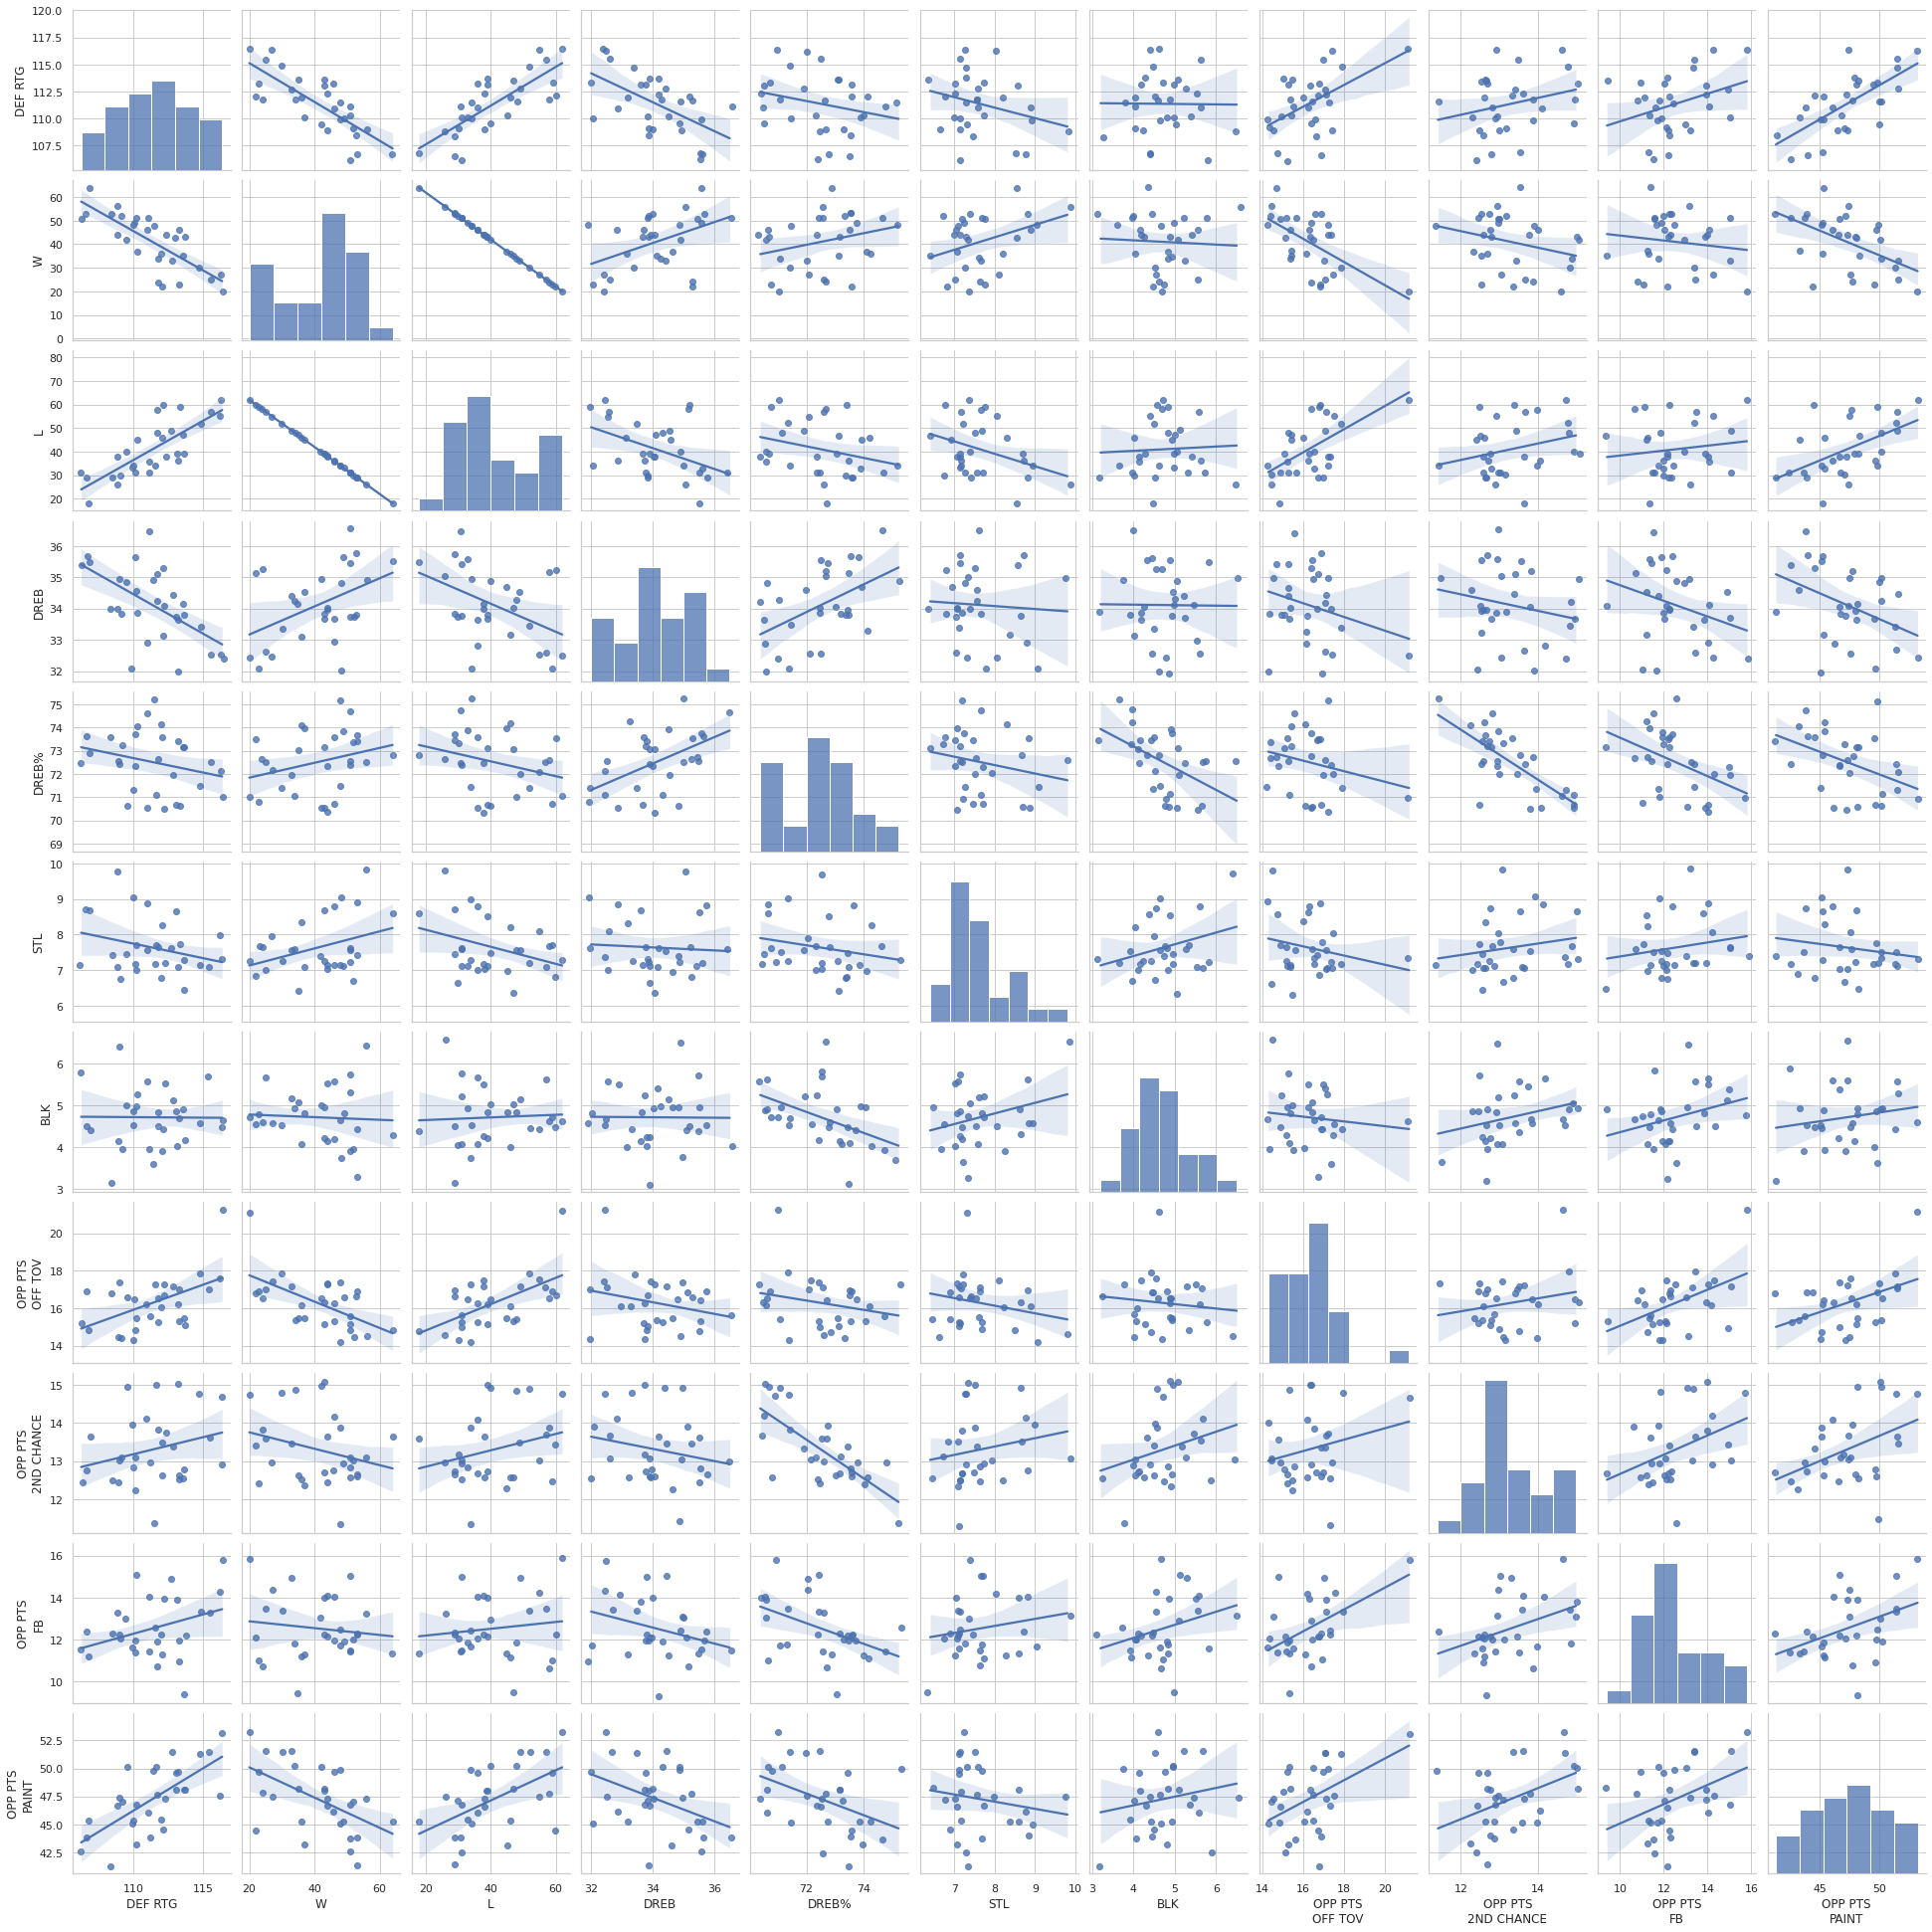

In [19]:
#Lets visualize the correlation between all of these defensive variables
sns.pairplot(nba_defense, kind="reg", plot_kws={"x_jitter": 0.1, "y_jitter": 0.1})
plt.show()

##### Based off of this pairplot losses have the strongest correlation to defensive rating, which we could have all assumed. The more points you allow the less chances you have of winning.

##### In terms of defensive categorical statistics, defensive rating is highly correlated to opposition points in the the paint and negatively correlated to defensive rebounds.

##### Defensive rebounds have a high impact on whether a team has a high or low defensive rating.            The more opposition paint points the higher the defensive rating (which is a bad thing.) 

## 3.5 Defenseve Rating vs Defensive Rebound <a id="3.5"></a>

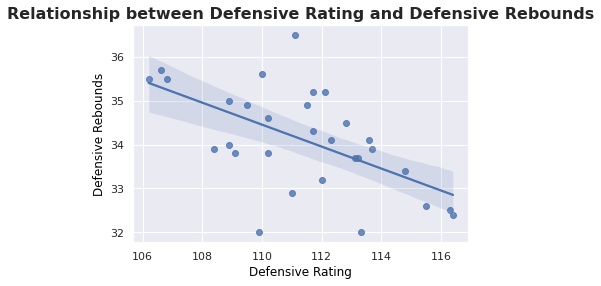

In [20]:
# using seaborn plot the relationship between defensive rating and defensive rebounds
#add a trend line to the plot to show the relationship between defensive rating and defensive rebounds
sns.set(style="darkgrid")
sns.regplot(x="DEF RTG", y="DREB", data=nba_defense)
plt.title('Relationship between Defensive Rating and Defensive Rebounds', fontsize=16, fontweight='bold')
plt.xlabel('Defensive Rating', fontsize=12, color='black')
plt.ylabel('Defensive Rebounds', fontsize=12, color='black')
plt.show()


##### Generally the more defensive rebounds a team averages the better their defensive rating is. Now let's see how this affects how many games a team wins

## 3.6 Defensive Variable's Impact on Winning <a id="3.6"></a>

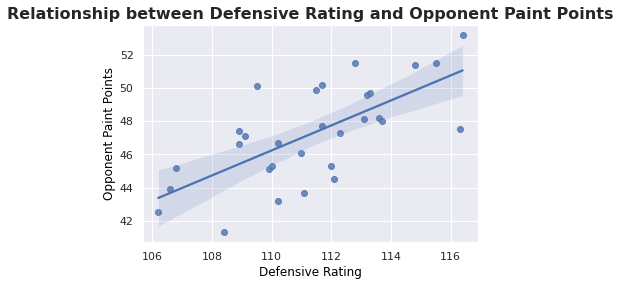

In [21]:
# using seaborn plot the relationship between defensive rating and opp paint points
#add a trend line to the plot to show the relationship between defensive rating and opp paint points
sns.set(style="darkgrid")
sns.regplot(x="DEF RTG", y="OPP PTS\nPAINT", data=nba_defense)
plt.title('Relationship between Defensive Rating and Opponent Paint Points', fontsize=16, fontweight='bold')
plt.xlabel('Defensive Rating', fontsize=12, color='black')
plt.ylabel('Opponent Paint Points', fontsize=12, color='black')
plt.show()

##### Teams that allow more paints in the point generally have a worse defensive rating. This is an interesting stat because earlier we saw that Centers on average lost 1.54 more games than teams who ran smaller lineups.

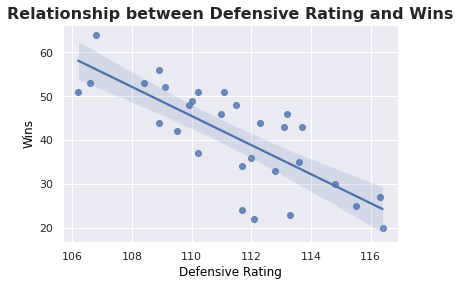

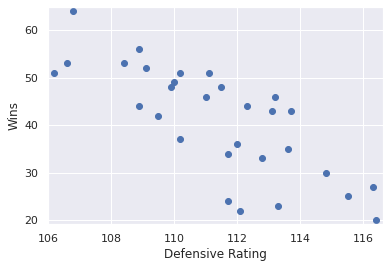

In [22]:
# visualize the relationship between defensive rating and wins
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
# Create the scatter plot
# create a regression line for the relationship between defensive rating and wins
sns.regplot(x="DEF RTG", y="W", data=nba_defense)
plt.title('Relationship between Defensive Rating and Wins', fontsize=16, fontweight='bold')
plt.xlabel('Defensive Rating', fontsize=12, color='black')
plt.ylabel('Wins', fontsize=12, color='black')
plt.show()

plt.scatter(nba_defense['DEF RTG'], nba_defense['W'])
# Set the margins
plt.margins(0.02)
# Label the axes
plt.xlabel('Defensive Rating')
plt.ylabel('Wins')
# Show the plot
plt.show()

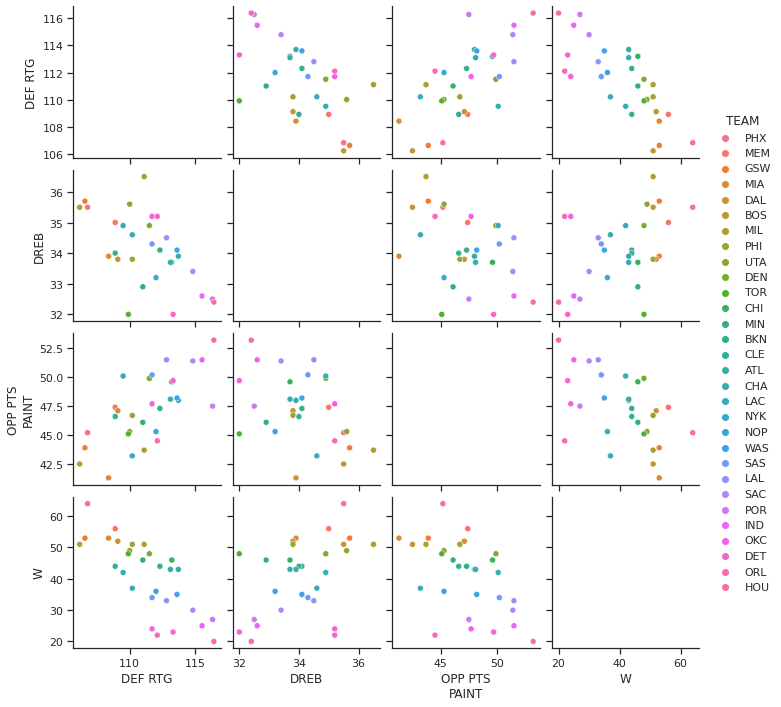

In [23]:
#create a sns pairplot to visualize the relationship between defensive rating, defensive rebounds, opp paint points, and wins

sns.set(style="ticks")
sns.pairplot(nba_defense, hue='TEAM', vars=['DEF RTG', 'DREB', 'OPP PTS\nPAINT', 'W'])
plt.show()

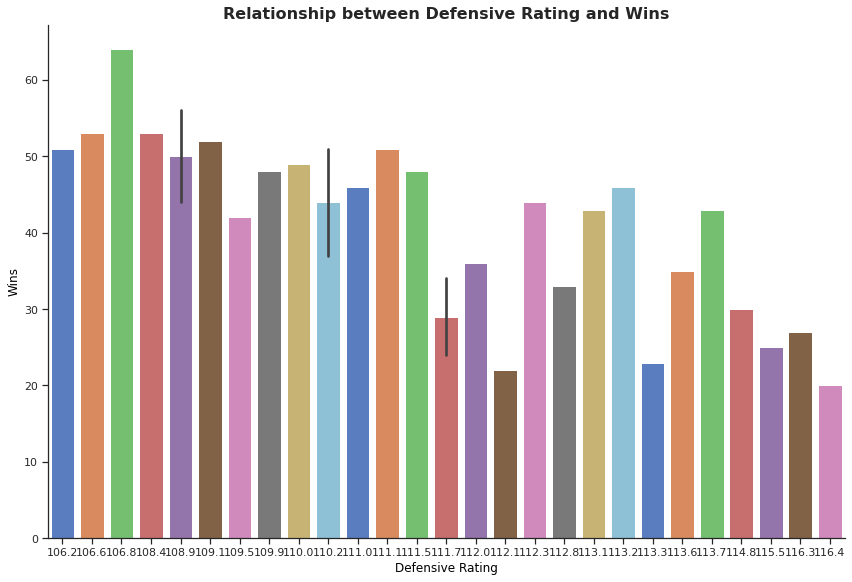

In [24]:
# Create a catplot for the relationship between defensive rating and Wins
sns.catplot(x="DEF RTG", y="W", data=nba_defense, kind="bar", palette="muted", height=8, aspect=1.5)
plt.title('Relationship between Defensive Rating and Wins', fontsize=16, fontweight='bold')
plt.xlabel('Defensive Rating', fontsize=12, color='black')
plt.ylabel('Wins', fontsize=12, color='black')
plt.show()

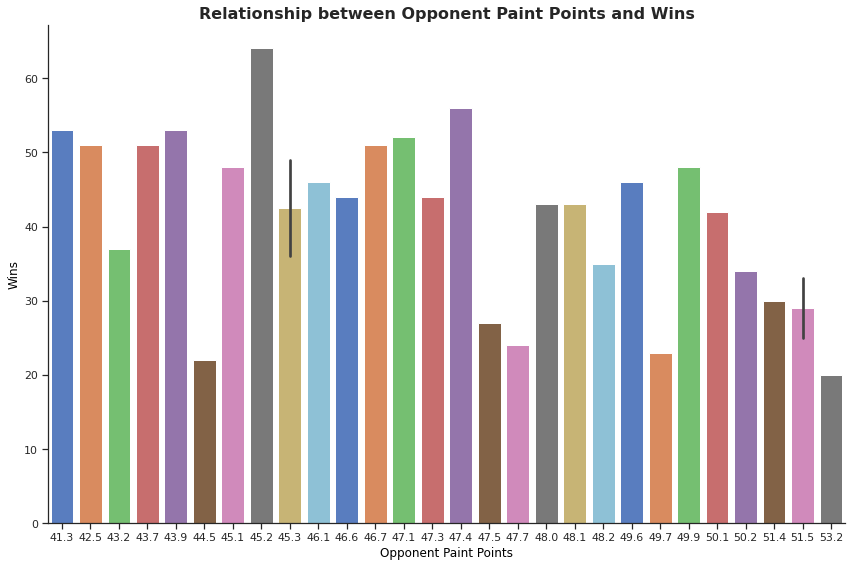

In [25]:
# Create a catplot for the relationship between OPP P POINTS and Wins
sns.catplot(x="OPP PTS\nPAINT", y="W", data=nba_defense, kind="bar", palette="muted", height=8, aspect=1.5)
plt.title('Relationship between Opponent Paint Points and Wins', fontsize=16, fontweight='bold')
plt.xlabel('Opponent Paint Points', fontsize=12, color='black')
plt.ylabel('Wins', fontsize=12, color='black')
plt.show()

##### Defensive rating and opposition paint points have a positive correlation, but that doesn't neccesarily translate when looking at wins and opposition paint points. This catplot doesn't look as linear as the previous one that compared Defensive ratings and wins, there are a few outliers that deiviate from the trend, but overall you can still see that teams who allow less paints in the point have greater success in winning more games.

## 4 Predicting Wins based off of Highly Correlated Defensive Variables <a id="3.6"></a>

In [26]:
model = LinearRegression()
#fit the model to the data
model.fit(nba_defense[['DREB']], nba_defense['W'])
#predict the number of wins a team will have based on their defensive rebounds
nba_defense['Predicted Wins'] = model.predict(nba_defense[['DREB']])
#print the predicted number of wins a team will have based on a defensive rating of 33.8
print('Predicted number of wins for a team that averages 33.8 defensive reboubds: \n', nba_defense['Predicted Wins'][nba_defense['DREB'] == 33.8])
#print the team with a defensive rating of 33.8
print('Teams that averages 33.8 defensive reboubds: \n', nba_defense['TEAM'][nba_defense['DREB'] == 33.8])
#compare predicted wins to actual wins for the team with DREB of 33.8
print('Actual number of wins for a team that averages 33.8 defensive reboubds: \n', nba_defense[nba_defense['DREB'] == 33.8]['W'])
#what is the accuracy of the model?
model.score(nba_defense[['DREB']], nba_defense['W']).round(2)

Predicted number of wins for a team that averages 33.8 defensive reboubds: 
 4    39.610142
7    39.610142
Name: Predicted Wins, dtype: float64
Teams that averages 33.8 defensive reboubds: 
 4    DAL
7    PHI
Name: TEAM, dtype: object
Actual number of wins for a team that averages 33.8 defensive reboubds: 
 4    52
7    51
Name: W, dtype: int64


0.2

In [27]:
# Predict how many wins a team will have based on their defensive rating using a linear regression model
#create a linear regression model
model = LinearRegression()
#fit the model to the data
model.fit(nba_defense[['DEF RTG']], nba_defense['W'])
#predict the number of wins a team will have based on their defensive rating
nba_defense['Predicted Wins'] = model.predict(nba_defense[['DEF RTG']])
#print the predicted number of wins a team will have based on a defensive rating of 109.1
print('Predicted number of wins for a team with a defensive rating of 109.1: \n',nba_defense['Predicted Wins'][nba_defense['DEF RTG'] == 109.1])
#print the predicted team with a defensive rating of 109.1
print('Teams that have a defensive rating of 109.1: \n',nba_defense['TEAM'][nba_defense['DEF RTG'] == 109.1])
#compare predicted wins to actual wins for the team with DEF RTG of 109.1
print('Actual number of wins for a team with a defensive rating of 109.1: \n',nba_defense[nba_defense['DEF RTG'] == 109.1]['W'])
#what is the accuracy of the model?
model.score(nba_defense[['DEF RTG']], nba_defense['W']).round(2)


Predicted number of wins for a team with a defensive rating of 109.1: 
 4    48.488419
Name: Predicted Wins, dtype: float64
Teams that have a defensive rating of 109.1: 
 4    DAL
Name: TEAM, dtype: object
Actual number of wins for a team with a defensive rating of 109.1: 
 4    52
Name: W, dtype: int64


0.59

##### Based on the linear regression model, we can say predict how many wins a team has based on their defensive ratings with about 59% confidence.

In [28]:
# Predict how many wins NYK will have based on their defensive rating
# Create the DMatrix: dmatrix
dmatrix = xgb.DMatrix(nba_defense[['DEF RTG']], nba_defense['W'])
# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}
# Train the model: xg_reg
xg_reg = xgb.train(params, dmatrix)
# Predict the labels: preds
preds = xg_reg.predict(dmatrix)
# Compute the root mean squared error: rmse
rmse = np.sqrt(np.mean((preds - nba_defense['W'])**2))
# print how many wins NYK will have based on their defensive rating
print(preds[18].round(0))
# print the accuracy of the model using the root mean squared error
print(rmse)

[17:42:18] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
44.0
5.803021724236127


## **5. Conclusion** <a id="5"></a>

##### What we can conclude from this notebook is a few things. First, height and wingspan does not have an impact on a teams defensive success. Second, defensive success is strongly correlated to 2 defensive metrics, defensive rebounds and opposition paint points. You could make the assumption that in order to be successful in these two defensive metrics, you would need to be taller, that was not the case. We found that the correlation between defensive rating and average height and wingspan to be close to 0. 

##### The ultimate goal of every NBA team is to win games. Based on my analysis, you have a greater chance of winning games if you have players who can protect the paint and secure defensive rebounds.

<a><img src="https://outdoorbasketballhub.com/wp-content/uploads/2021/12/Rajon-Rondo.jpg" width="600" /></a>

